## 方法一
> 适用于xarray数组，需要用到geopandas和salem库  
shp = gpd.read_file(path).set_index('NAME') 'NAME'为SHP文件DataFrame的列名；'China'为提取，即非mask的区域

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import geopandas as gpd
import xarray as xr
import salem

In [9]:
data = xr.open_dataset('D:/Py-PY/WqW/u119-tas1/tas_Amon_EC-Earth3-Veg-LR_ssp119_r1i1p1f1.nc')
data = data['tas']
ds = data[0]


def MaskRegion(ds, region='china'):
    path = r'E:/SHP/world_shp/world_adm0_Project.shp'
    shp = gpd.read_file(path).set_index('NAME')
    if region != 'China':
        shp = shp.loc[region, :] ###
    ds_mask = ds.salem.roi(shape=shp)
    return ds_mask

ds_mask = MaskRegion(ds, ["China"])

<Figure size 3200x2400 with 0 Axes>

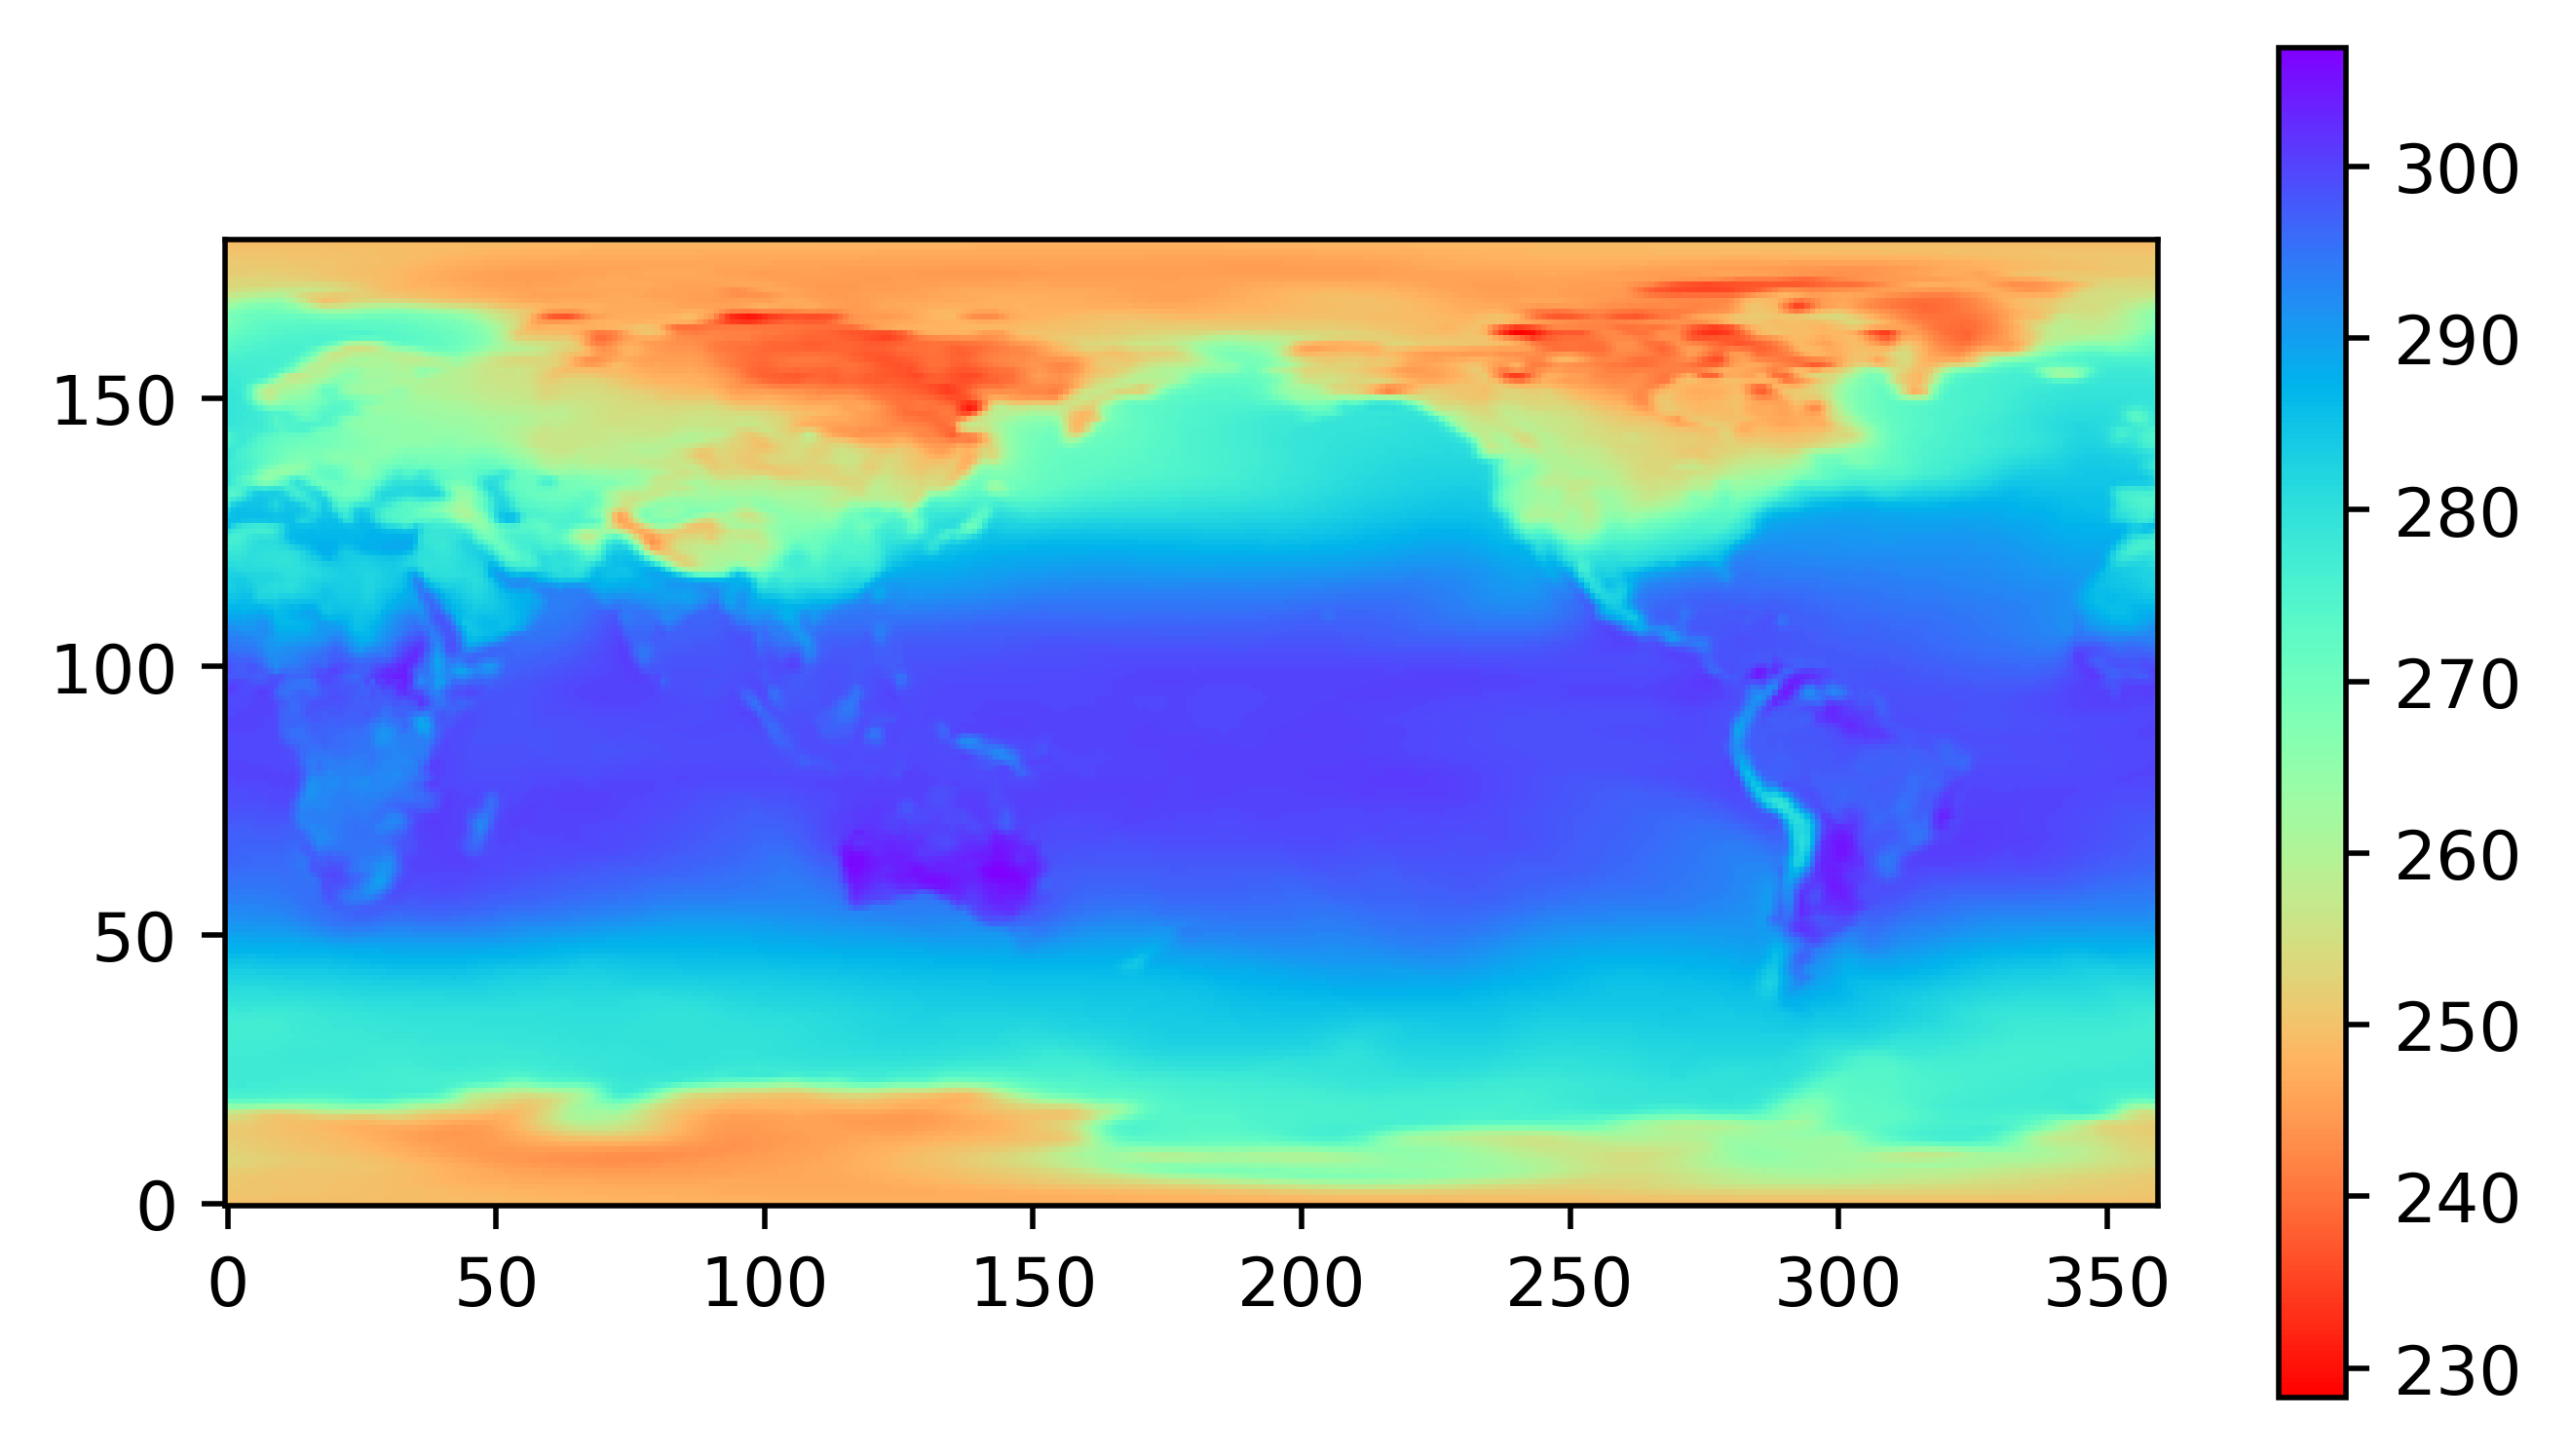

In [10]:
plt.figure(1, dpi=500)
plt.imshow(ds, cmap='rainbow_r', origin="lower")
plt.colorbar(shrink=0.75)
plt.show()

<Figure size 3200x2400 with 0 Axes>

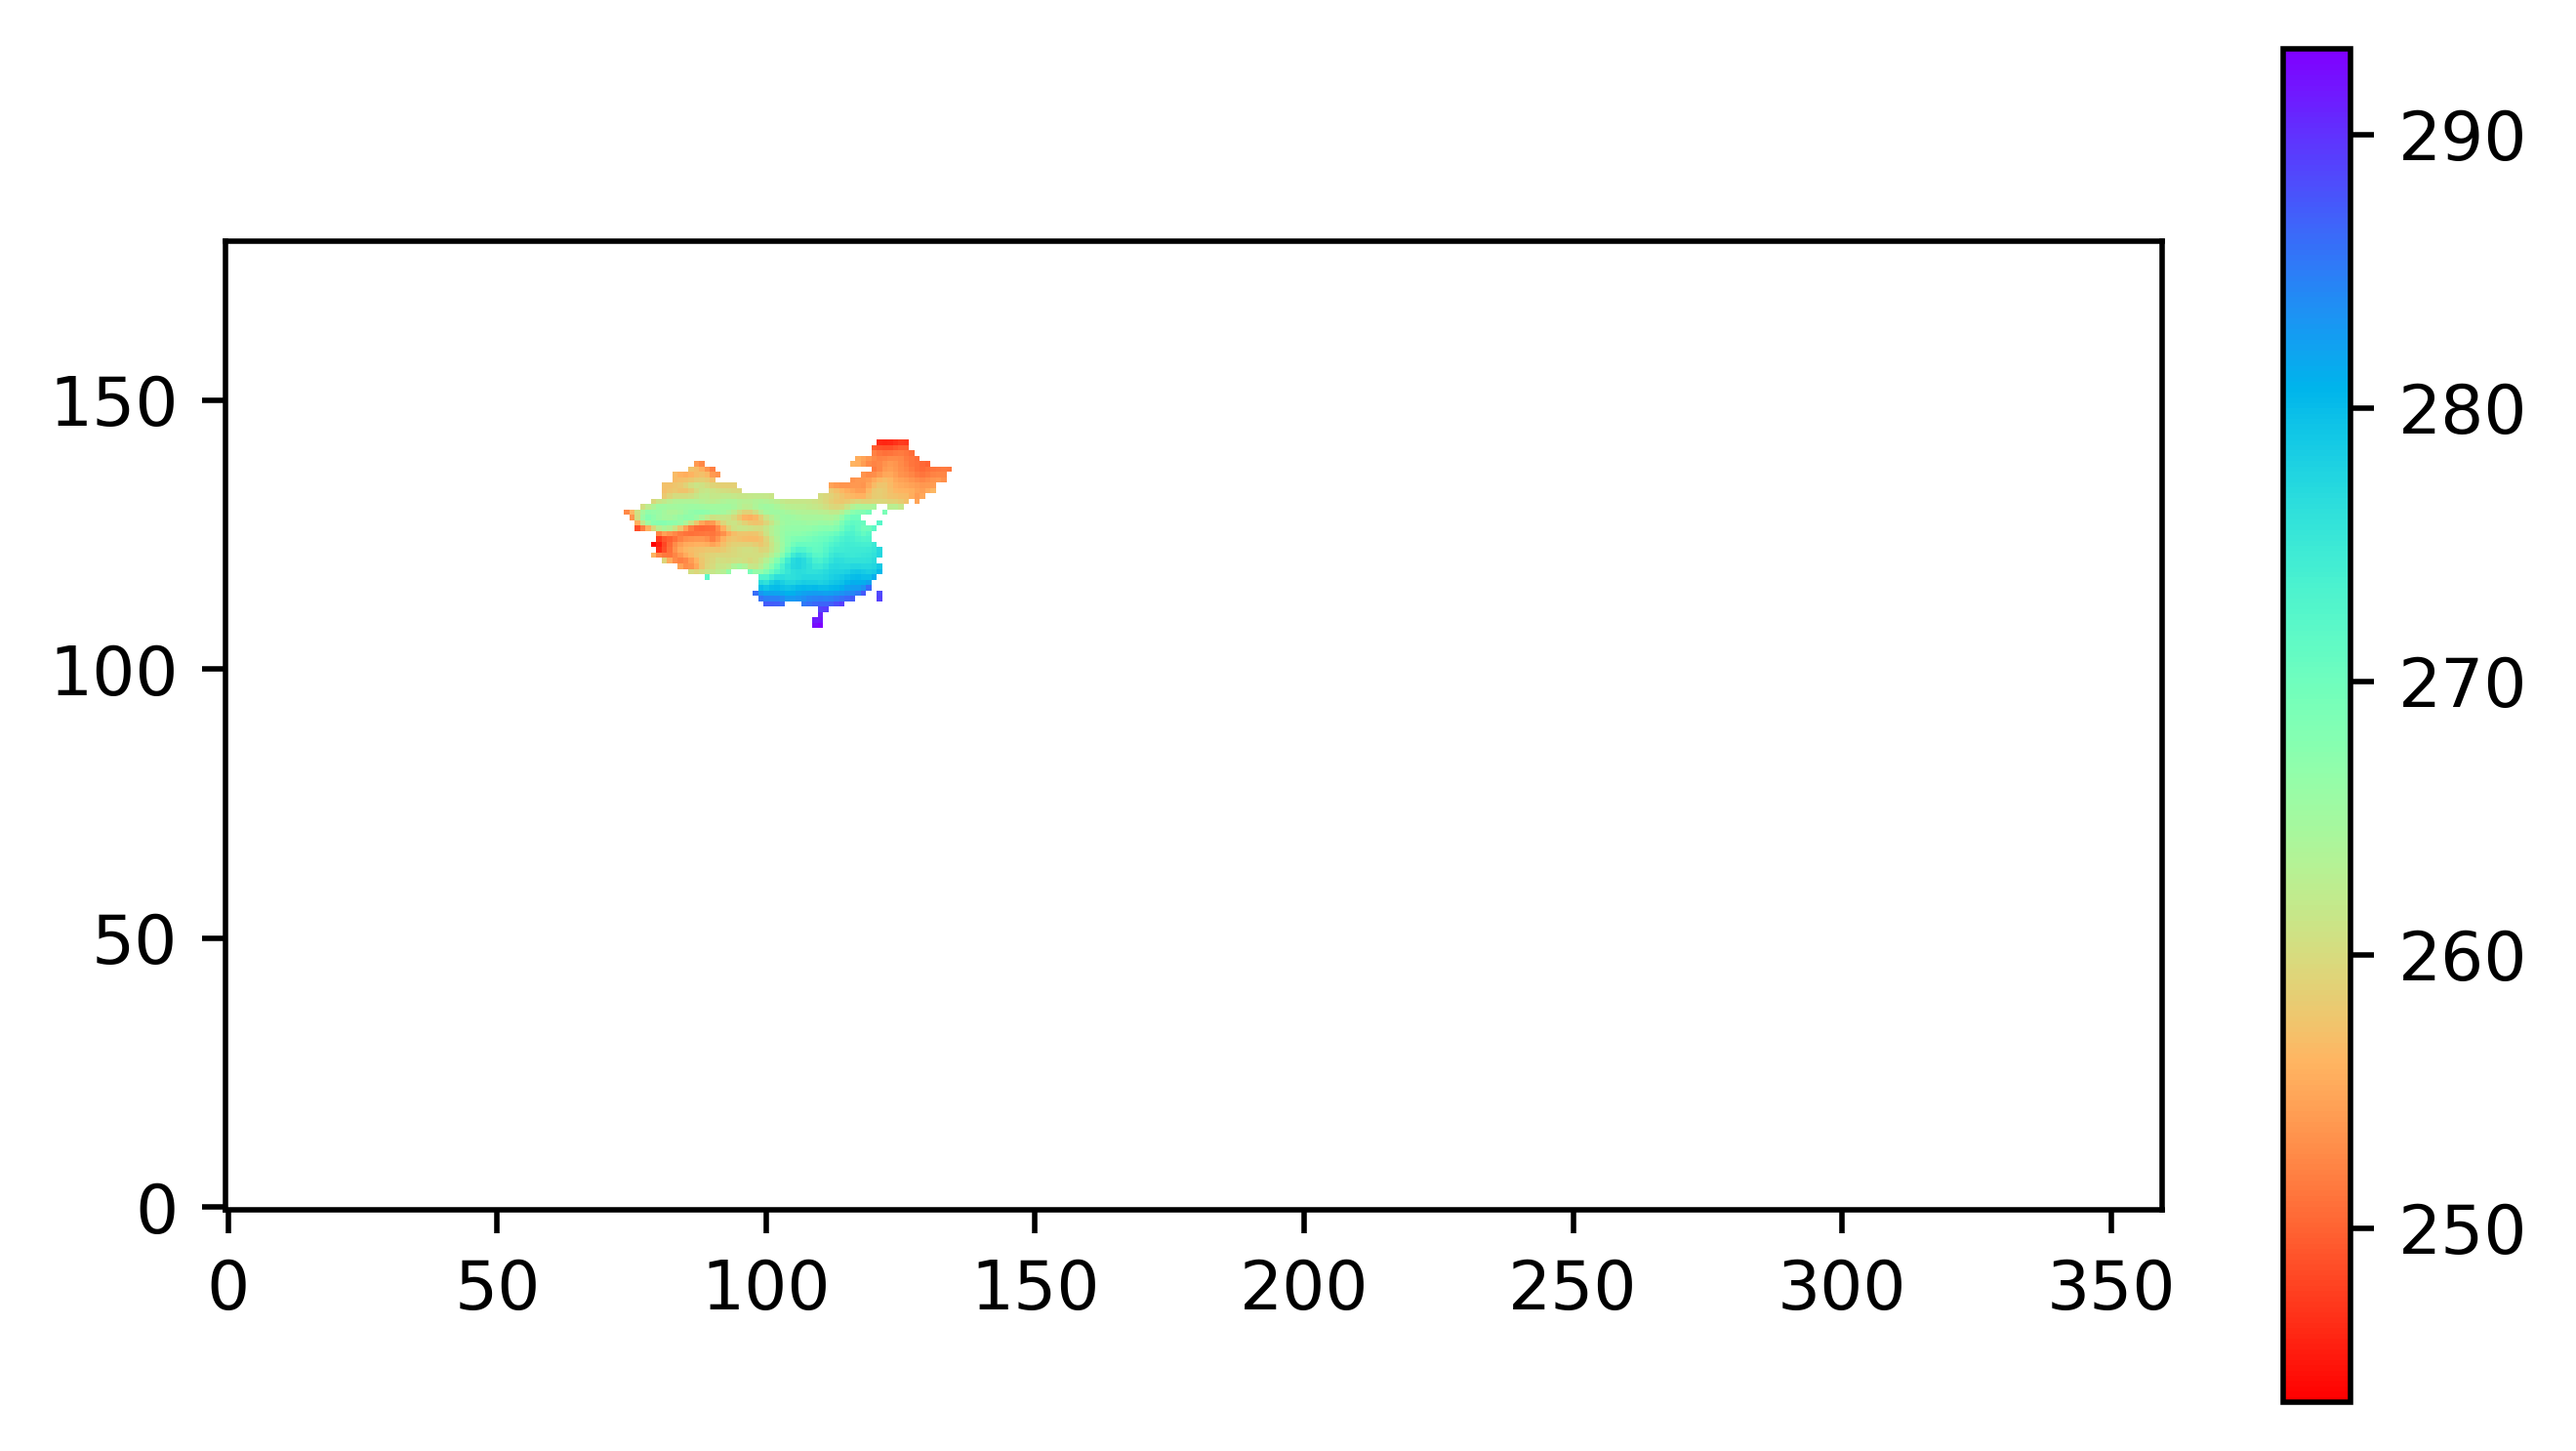

In [4]:
plt.figure(1, dpi=500)
plt.imshow(ds_mask, cmap='rainbow_r', origin="lower")
plt.colorbar(shrink=0.75)
plt.show()